# Chapter 6 결정트리
SVM처럼 결정트리(deicision ree)는 분류와 회귀, 다중출력 작업이 가능한 알고리즘이다. 또한 복잡한 데이터셋도 학습할 수 있는 강력한 알고리즘이다.
랜덤포레스트의 기본요소가 결정트리이다.

먼저 결정트리를 이해하기 위해 붓꽃 데이터를 예측하는 간단한 모델을 하나 만들어보겠다.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:,2:] #꽃잎의 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

export_graphviz() 함수를 사용해 그래프의 정의를 iris_tree.dot 파일로 출력하여 훈련된 결정트리를 시각화 할 수 있다.

[Text(0.4, 0.8333333333333334, 'X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

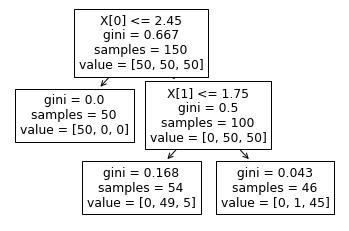

In [9]:
sklearn.tree.plot_tree(tree_clf)

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file = "iris_tree.dot", #outfile 이름
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded=True, #이거 두개는 뭔지 잘 모르겠음
    filled=True
)

결정트리는 루트노트부터 조건을 확인하면서 자식으로 내려가며 leaf node에 도달하면 해당 데이터의 분류를 마친다. 결정트리의 장점 중 하나는 데이터의 전처리가 거의 필요하지 않다는 것이다. (특성의 스케일을 맞추거나 평균을 원점에 맞추는 작업)

위 그림을 보면 꽃잎의 길이가 2.45보다 작다면 (깊이1, 왼쪽노드) setosa
길이가 2.45보다 길다면 꽃잎의 너비가 1.75보다 작다면 (깊이2, 왼쪽노드) versicolor
길이가 2.45보다 길고 꽃잎의 너비가 1.75보다 크다면 (깊이2, 오른쪽노드) virginica로 분류한다.
트리의 sample 속성은 해당 클래스에 몇개의 훈련 샘플이 속하는지 알려준다.
gini는 불순도(impurity)를 측정하는데 한 노드의 모든 샘플이 같은 클래스에 속한다면 이 노드를 순수(gini=0)이라 한다.

화이트박스와 블랙박스
결정트리는 직관적이고 결정 방식을 이해하기가 쉬움(화이트박스)
앞으로 볼 랜덤포레스트나 신경망은 블랙박스 모델임. 어떤 예측이 나왔을 때 왜 이런 예측을 했는지 그 기준을 알기가 어렵다.

## 클래스 확률 추정
결정 트리는 한 샘플이 특정 클래스 k에 속할 확률을 추정할 수 있다. 이 한 샘플에 대해 맞는 리프노드를 탐색하고 그 클래스 k에 있는 훈련 샘플의 비율을 반환한다.

In [10]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

이 결과는 클래스 1에 속할 확률이 가장 높다는걸 보여준다.

In [11]:
tree_clf.predict([[5,1.5]])

array([1])

## CART 훈련 알고리즘
사이킷런은 결정 트리의 훈련을 위해 (= 트리를 성장시키기 위해) CART(classification and regression tree)알고리즘을 사용한다.
먼저 훈련 세트를 하나의 특성 k의 임곗값 $t_k$를 사용해 두개의 서브셋으로 나눈다. (예를 들어 꽃잎의 길이 <= 2.45)
이 k와 t_k를 고르는 기준은 가장 순수한 서브셋으로 나눌 수 있는 (k, $t_k$)짝을 찾는 것이다.

위의 '순수하다'는 불순도가 낮은 것을 의미한다

위 알고리즘을 보면 Greedy 알고리즘이라는 것을 알 수 있다. 각 단계에서 가장 최적의 (비용함수가 가장 적은) 방법을 찾아 계속 진행하는 것이다.
최적의 트리를 찾는것은 NP-완전 문제라서 어렵다. 그러므로' 어느정도 납득할만한 좋은 솔루션' 선에서 만족해야한다.

## 계산복잡도
예측을 하려면 한 데이터에 대해 트리의 leaf노드까지 도달해야하므로 일반적으로 $O(log_2(m))$의 복잡도가 요구된다.$m$은 데이터의 수
각 노드는 하나의 특성값만 확인하기 때문에 예측에 필요한 전체 복잡도는 특성 수와 무관하다. 즉, 큰 훈련 세트를 다룰 때(특성의 수가 많은 데이터) 유리하다.
훈련알고리즘은 각 노드에서 모든 훈련 샘플의 모든 특성을 비교하므로 훈련 복잡도는 $O(n \text{x} m log_2(m))$이다. 훈련세트의 특성 수가 너무 많은 경우 사이킷런의 특정 옵션 (presort=True)를 통해 미리 데이터를 정렬하는 방법을 통해 훈련의 속도를 높일 수 있다.

# 회귀
결정트리는 앞에서 말한대로 회귀에도 사용할 수 있다.
사이킷런의 DecisionTreeRegressor를 사용해 잡음이 섞인 2차함수 형태의 데이터셋에 max_depth = 2설정으로 회귀 트리를 만들어본다.

In [12]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[1] <= 0.8\nsquared_error = 0.667\nsamples = 150\nvalue = 1.0'),
 Text(0.2, 0.5, 'squared_error = 0.0\nsamples = 50\nvalue = 0.0'),
 Text(0.6, 0.5, 'X[1] <= 1.75\nsquared_error = 0.25\nsamples = 100\nvalue = 1.5'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.084\nsamples = 54\nvalue = 1.093'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.021\nsamples = 46\nvalue = 1.978')]

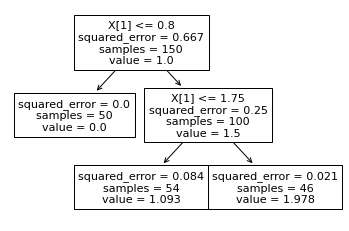

In [13]:
sklearn.tree.plot_tree(tree_reg)

결과는 앞에서 만든 분류 트리와 매우 비슷하게 생겼는데 주요 차이는 각 노드에서 클래스를 예측하는 대신 어떤 값을 예측한다는 것이다.

In [14]:
tree_reg3 = DecisionTreeRegressor(max_depth=3)#depth=3으로 바꿔봤다.
tree_reg3.fit(X,y)

DecisionTreeRegressor(max_depth=3)

[Text(0.375, 0.875, 'X[1] <= 0.8\nsquared_error = 0.667\nsamples = 150\nvalue = 1.0'),
 Text(0.25, 0.625, 'squared_error = 0.0\nsamples = 50\nvalue = 0.0'),
 Text(0.5, 0.625, 'X[1] <= 1.75\nsquared_error = 0.25\nsamples = 100\nvalue = 1.5'),
 Text(0.25, 0.375, 'X[0] <= 4.95\nsquared_error = 0.084\nsamples = 54\nvalue = 1.093'),
 Text(0.125, 0.125, 'squared_error = 0.02\nsamples = 48\nvalue = 1.021'),
 Text(0.375, 0.125, 'squared_error = 0.222\nsamples = 6\nvalue = 1.667'),
 Text(0.75, 0.375, 'X[0] <= 4.85\nsquared_error = 0.021\nsamples = 46\nvalue = 1.978'),
 Text(0.625, 0.125, 'squared_error = 0.222\nsamples = 3\nvalue = 1.667'),
 Text(0.875, 0.125, 'squared_error = 0.0\nsamples = 43\nvalue = 2.0')]

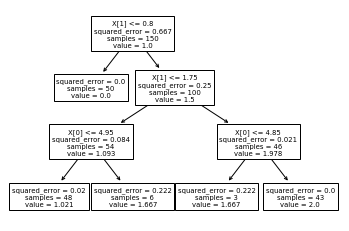

In [15]:
sklearn.tree.plot_tree(tree_reg3)

## 불안정성
결정트리의 장점이 많지만 훈련세트의 분포 모양에 따라 계단 모양의 결정 경계를 만든다. 이를 막기 위해 PCA를 사용한다면 1자로 예쁜 결정 경계를 만들 수 있다.